In [50]:
# Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf

### The steps below are following this https://www.kaggle.com/code/mikelkn/mnist-prediction,
### just to understand a process from zero and how the data is managed

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
X_train[0].shape


(28, 28)

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#keras work well with floats, so we must cast the numbers to floats

X_train = X_train.astype('float32')
y_train = y_train.astype('int32')   #we want them in integers
X_test = X_test.astype('float32')

In [9]:
print('The length of X_train is:', len(X_train))
print('The length of y_train is:', len(y_train))
print('The length of X_test is:', len(X_test))

The length of X_train is: 60000
The length of y_train is: 60000
The length of X_test is: 10000


In [11]:
y_train[766]    #y_train of 765 is 8. lets confirm this with the corresponding x_train

np.int32(8)

In [13]:
#Normalising all the numbers so that they are between o and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#As we saw, y_train contains digits from 0 to 9. this gives us 10 classes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
X_test = keras.utils.to_categorical(X_test, num_classes)

In [15]:
#Lets see what we did above. Remember y_train[765] = 8, now
print("Remember? before the step above, y_train[765] was 8 ")
print("Now, y_train[765] is: ", y_train[766])
print("\n")
print("This is because we did some form of one_hot_encoding ")

Remember? before the step above, y_train[765] was 8 
Now, y_train[765] is:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


This is because we did some form of one_hot_encoding 


In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (784,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) #10 since we have 10digits from 0 to 9

/Users/hjaviersarmientoy/Documents/1 Projects/ML/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#lets get a model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's compile the model
learning_rate = .001
model.compile(
	loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=['accuracy']
)

In [19]:
#We need to split our train data into train and validation set to fed it into the neuralnet
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [20]:
#Let's fit the model
epoch = 30

history =model.fit(x_train, y_train,
	epochs = epoch,
	batch_size = 128,
	verbose = 1,
	validation_data = (x_val, y_val)
)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6518 - loss: 1.0760 - val_accuracy: 0.9143 - val_loss: 0.2863
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8936 - loss: 0.3732 - val_accuracy: 0.9396 - val_loss: 0.2015
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9148 - loss: 0.2861 - val_accuracy: 0.9475 - val_loss: 0.1744
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9256 - loss: 0.2550 - val_accuracy: 0.9521 - val_loss: 0.1601
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9339 - loss: 0.2228 - val_accuracy: 0.9561 - val_loss: 0.1457
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9388 - loss: 0.2120 - val_accuracy: 0.9602 - val_loss: 0.1354
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9436 - loss: 0.1913 - val_accuracy: 0.9593 - val_loss: 0.1365
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9444 - loss: 0.1884 - val_accuracy: 0.

In [21]:
#we evaluate the performance of our model on the validation data.
score = model.evaluate(x_val, y_val, verbose = 0)
print("The accuracy of the validation is: ", score[1])
print("The loss of the validation is: ", score[0])

The accuracy of the validation is:  0.9706666469573975
The loss of the validation is:  0.12442842125892639


In [22]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
#We plot the cross_entropy loss vs the accuracy.
def plot_loss_accuracy(history):
    fig = plt.figure(figsize = (12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], 'r-x', label = "train loss")
   
    ax.plot(history.history["val_loss"], 'g-x', label = "validation loss")
    ax.legend()
    ax.set_title("Cross entropy loss")
    ax.grid(True)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"], "r-x", label = "train accuracy")
    ax.plot(history.history["val_accuracy"], "g-x", label = "validation accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)
 

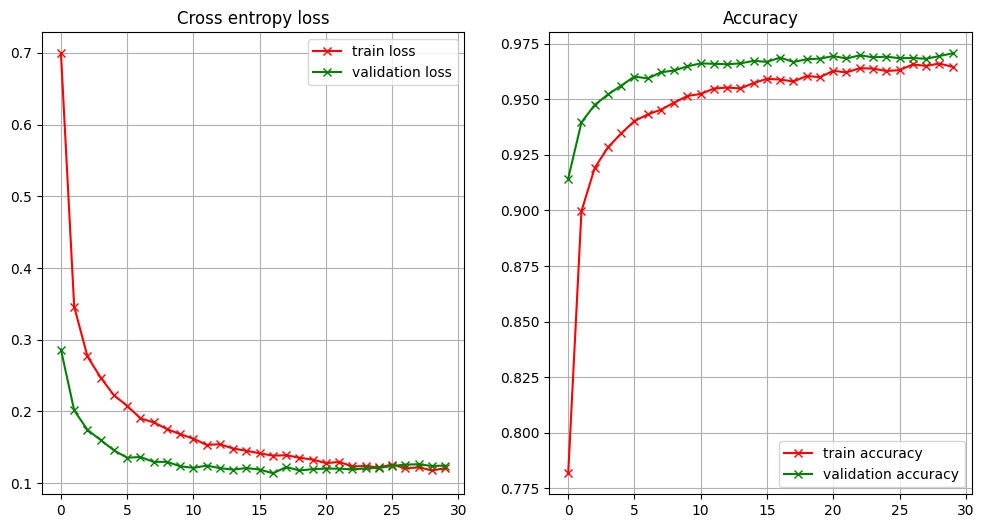

In [24]:
plot_loss_accuracy(history)


In [25]:
X_train_example = X_train.reshape(len(X_train), 28, 28, 1)

print('After reshapping, the shape of the X_test set is: ', X_train_example.shape)

After reshapping, the shape of the X_test set is:  (60000, 28, 28, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
 predicting a Two: 
[[4.80033731e-14 1.46379575e-08 8.95535095e-08 1.55530768e-06
  1.02771296e-12 3.63461261e-08 3.09849611e-11 7.49397627e-11
  9.99998331e-01 1.31191713e-09]]
 Largest Prediction index: 8


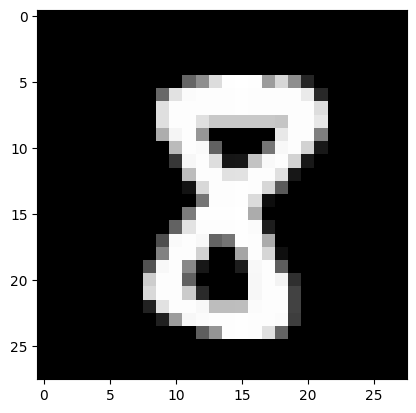

In [52]:
image_of_eight = X_train_example[766]
image_of_eight.shape
prediction = model.predict(image_of_eight.reshape(1, 784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
plt.imshow(image_of_eight[:,:,0], cmap='Greys_r')

### The following steps are following the knowledge learnt by ML specialization on Coursera

In [53]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model_2 = Sequential(
    [               
        ### START CODE HERE ### 
        Dense(units=25, activation='relu', input_shape = (784,), name='L1'),
        Dense(units=15, activation='relu', input_shape=(25,), name='L2'),
        Dense(units=10, activation='linear', name='L3')
        ### END CODE HERE ### 
    ], name = "my_model" 
)


/Users/hjaviersarmientoy/Documents/1 Projects/ML/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
[layer1, layer2, layer3] = model_2.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [56]:
y_train.shape
test = tf.argmax(y_train, axis=-1)
test.shape

TensorShape([45000])

In [ ]:
model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history_2 = model_2.fit(
    x_train, test,
    epochs=40,
)


Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.8058
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - loss: 0.2260
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - loss: 0.1785
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - loss: 0.1524
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - loss: 0.1343
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - loss: 0.1210
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 523us/step - loss: 0.1106
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 0.1020
Epoch 9/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.0952
Epoch 10/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.0894
Epoch 11/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step - loss: 0.0838
Epoch 12/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - loss: 0.0784
Epoch 13/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 0.0735
Epoch 14/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 0.0686
E

(28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 predicting a Two: 
[[  3.4580624  -5.927885  -19.324444  -10.787802    2.5364997   3.6165326
   43.461304  -18.355324  -15.689998  -23.775345 ]]
 Largest Prediction index: 6


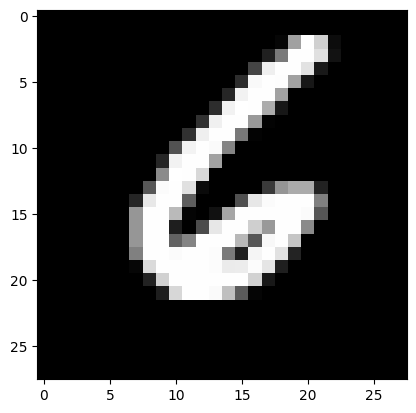

In [59]:
image_of_two = X_train_example[785]
print(image_of_two.shape)
prediction = model_2.predict(image_of_two.reshape(1, 784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")
plt.imshow(image_of_two[:,:,0], cmap='Greys_r')